# 📌 Predicting Gender Using Dental Metrics

* **Name: Leela Josna Kona**
* Dataset: Dentistry Dataset.csv
* DSBA/MBAD 6211 - Final Project

### Problem Definition



**Project Overview**
This project utilizes dental measurement to predict if a person is male or female. By applying predictive modeling techniques likes Logistic, Random Forest, we will try to find patterns in tooth data that can help in gender identification. These prediction methods can support in areas like forensic science and anthropology.

**Objective**
The primary goal is to analyze dental data and build machine learning models that predict gender based on a combination of dental metrics.


**Dataset Overview:** Dentistry Dataset.csv
- The dataset consists of 1,100 records.
- It includes various dental measurements, such as intercanine distance, canine width,
and canine index values.
- The target variable is gender (Male/Female), which will be encoded numerically for modeling.

## 📌 Import Libraries

In [ ]:
# !pip install xgboost

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

## 📌 Load Dataset

In [ ]:

dentistry_lk = pd.read_csv("Dentistry Dataset.csv")
dentistry_lk.drop(columns=["Sample ID", "Sl No"], inplace=True)
dentistry_lk.columns = [col.strip().lower().replace(" ", "_") for col in dentistry_lk.columns]
dentistry_lk['gender'] = dentistry_lk['gender'].map({'Male': 1, 'Female': 0})
dentistry_lk.head()


,age,gender,inter_canine_distance_intraoral,intercanine_distance_casts,right_canine_width_intraoral,right_canine_width_casts,left_canine_width_intraoral,left_canine_width_casts,right_canine_index_intra_oral,right_canine_index_casts,left_canine_index_intraoral,left_canine_index_casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


## 📌 Exploratory Data Analysis

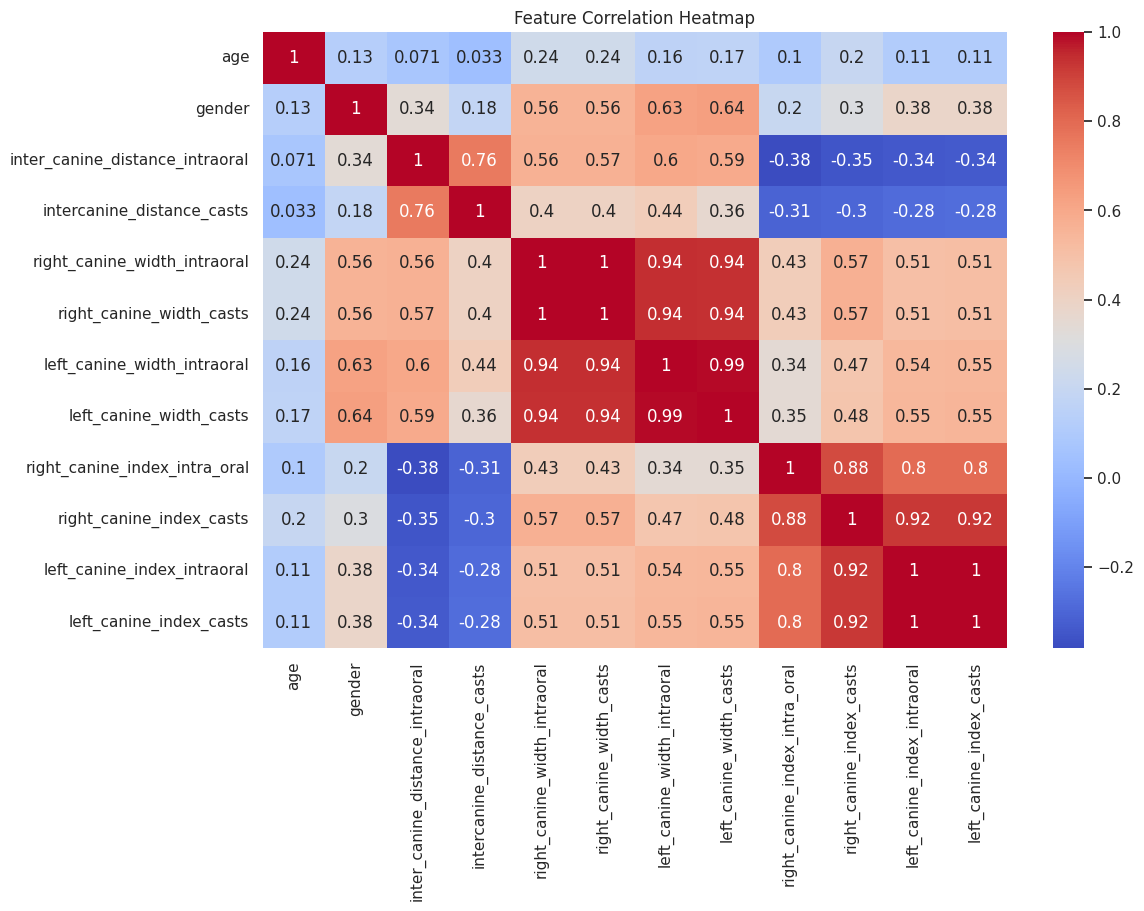

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(dentistry_lk.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## 📌 Data Preparation

In [ ]:

X = dentistry_lk.drop('gender', axis=1)
y = dentistry_lk['gender']

X_train_lk, X_test_lk, y_train_lk, y_test_lk = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_lk_scaled = scaler.fit_transform(X_train_lk)
X_test_lk_scaled = scaler.transform(X_test_lk)


## 📌 Compare Multiple Models

In [ ]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_lk_scaled, y_train_lk)
    y_pred = model.predict(X_test_lk_scaled)

    acc = accuracy_score(y_test_lk, y_pred)
    roc = roc_auc_score(y_test_lk, y_pred)
    report = classification_report(y_test_lk, y_pred, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC AUC": roc,
        "Precision (Male)": report["1"]["precision"],
        "Recall (Male)": report["1"]["recall"],
        "F1-score (Male)": report["1"]["f1-score"],
        "Precision (Female)": report["0"]["precision"],
        "Recall (Female)": report["0"]["recall"],
        "F1-score (Female)": report["0"]["f1-score"]
    })

results_dentistry_lk = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
results_dentistry_lk.reset_index(drop=True, inplace=True)
results_dentistry_lk


,Model,Accuracy,ROC AUC,Precision (Male),Recall (Male),F1-score (Male),Precision (Female),Recall (Female),F1-score (Female)
0,XGBoost,0.909091,0.909271,0.899083,0.915888,0.907407,0.918919,0.902655,0.910714
1,Random Forest,0.890909,0.891820,0.860870,0.925234,0.891892,0.923810,0.858407,0.889908
2,Logistic Regression,0.850000,0.849516,0.855769,0.831776,0.843602,0.844828,0.867257,0.855895
3,Decision Tree,0.845455,0.845836,0.828829,0.859813,0.844037,0.862385,0.831858,0.846847


## 📌 Accuracy Comparison of Models

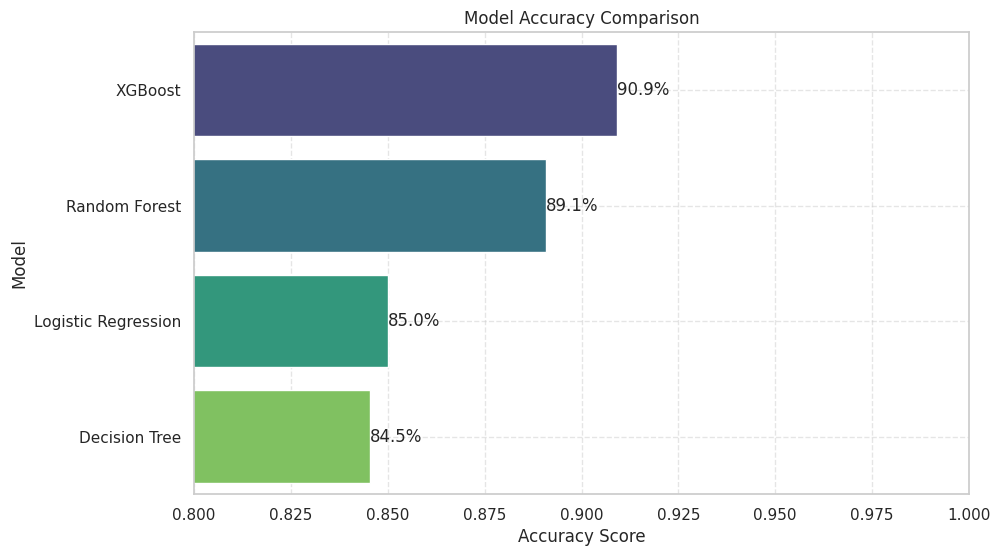

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=results_dentistry_lk, x="Accuracy", y="Model", palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.xlim(0.8, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
for container in ax.containers:
    plt.bar_label(container, fmt='{:.1%}')
plt.show()

## 📌 Random Forest: Hyperparameter Tuning

In [ ]:

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train_lk_scaled, y_train_lk)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 7, 'n_estimators': 100}


## 📌 Model Evaluation (Random Forest)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       113
           1       0.86      0.88      0.87       107

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



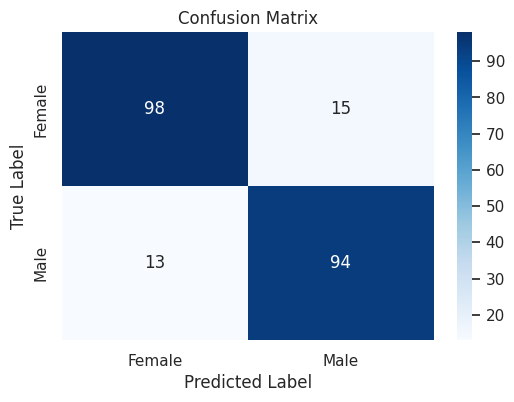

ROC AUC Score: 0.8728806550326689


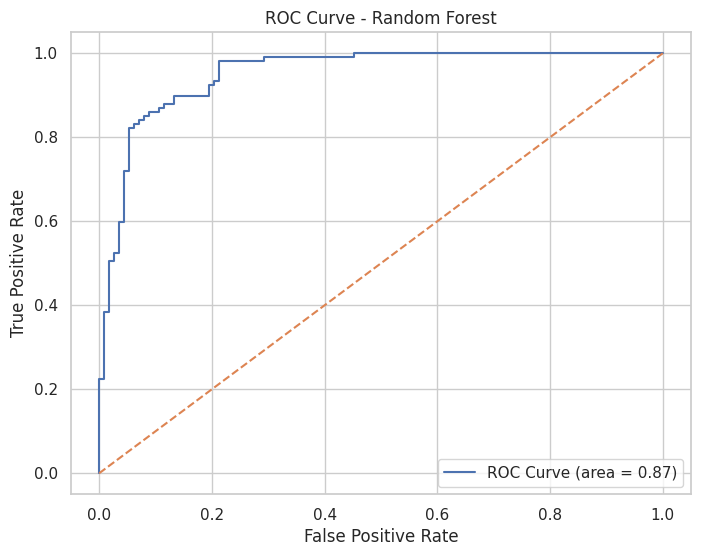

In [ ]:

y_pred = grid.predict(X_test_lk_scaled)

print("\nClassification Report:\n", classification_report(y_test_lk, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_lk, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Female', 'Male'],
            yticklabels=['Female', 'Male'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


print("ROC AUC Score:", roc_auc_score(y_test_lk, y_pred))

fpr, tpr, _ = roc_curve(y_test_lk, grid.predict_proba(X_test_lk_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test_lk, y_pred))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


## 📌 Feature Importance (Random Forest)

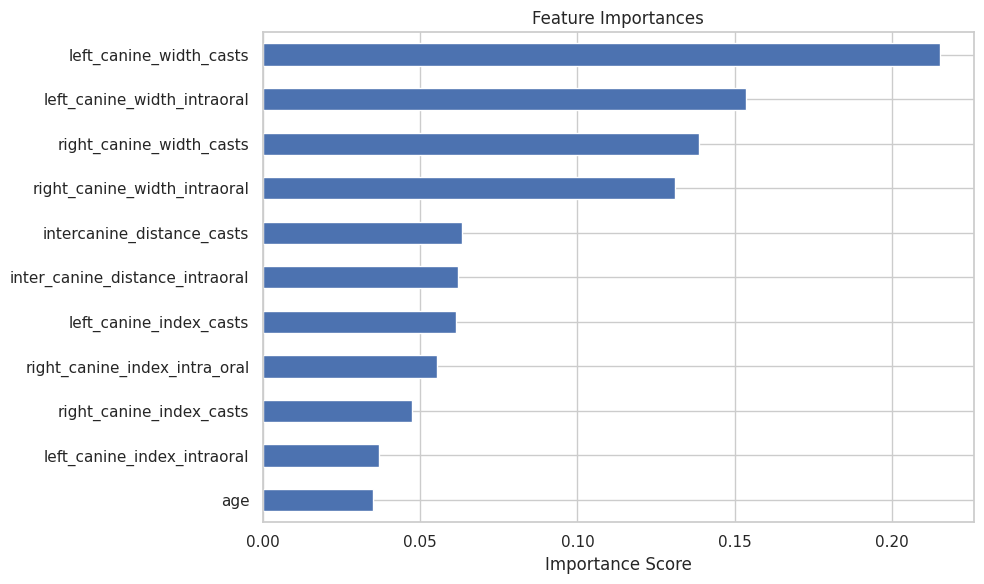

In [ ]:

feature_importances = pd.Series(grid.best_estimator_.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), title='Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


## 📌 Cross-Validation Performance Summary

In [ ]:

cv_scores = cross_val_score(grid.best_estimator_, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard Deviation: {:.4f}".format(cv_scores.std()))


Cross-Validation Scores: [0.79090909 0.84090909 0.68636364 0.82727273 0.83181818]
Mean Accuracy: 0.7955
Standard Deviation: 0.0571


## 📌 XG Boost: Hyperparameter Tuning

In [ ]:
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_grid = GridSearchCV(estimator=xgb_model,
                        param_grid=xgb_param_grid,
                        scoring='accuracy',
                        cv=5,
                        verbose=1,
                        n_jobs=-1)

xgb_grid.fit(X_train_lk_scaled, y_train_lk)

print("Best XGBoost Parameters:", xgb_grid.best_params_)
print("Best XGBoost Accuracy: {:.4f}".format(xgb_grid.best_score_))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best XGBoost Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Best XGBoost Accuracy: 0.9080


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       113
           1       0.87      0.91      0.89       107

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



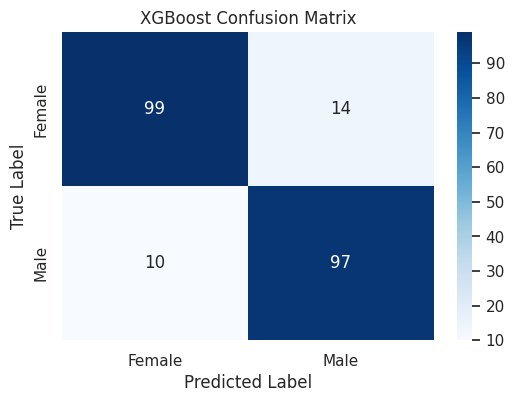

In [ ]:
xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test_lk_scaled)
print("XGBoost Classification Report:\n", classification_report(y_test_lk, y_pred_xgb))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_lk, y_pred_xgb), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Female', 'Male'],
            yticklabels=['Female', 'Male'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost Confusion Matrix")
plt.show()

## 📌 Feature Importance (XG Boost)

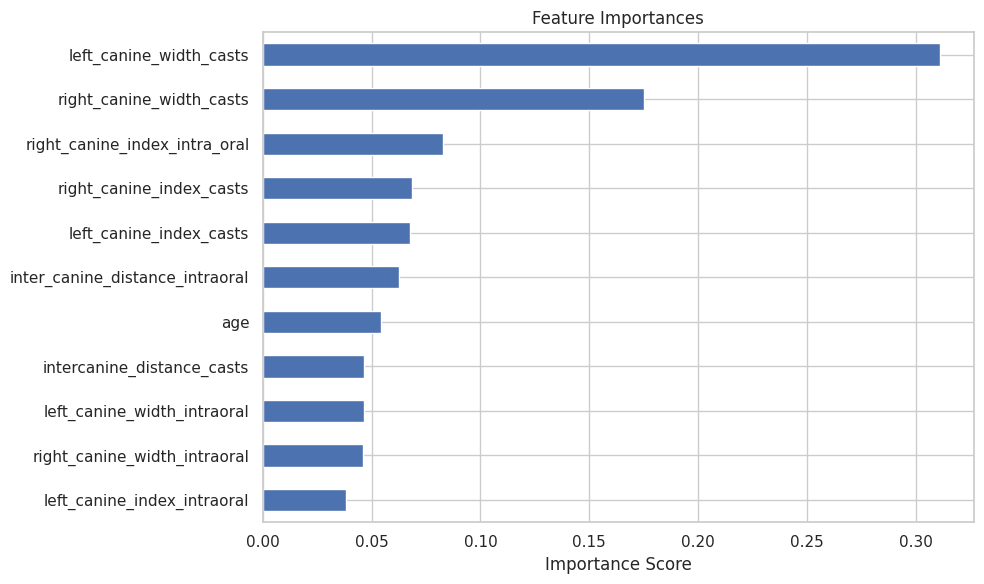

In [ ]:
feature_importances = pd.Series(xgb_grid.best_estimator_.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), title='Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

## ✅ Conclusion

Random Forest and XGBoost performed well in predicting gender using dental features. Hyperparameter tuning and cross-validation helped improve model reliability.